# **About Data**
## **Data Dictionary**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location
P

# **Questions**
1. Import necessary libraries and load the dataset and display random 5 samples. Check the info of the data and write your findings.
2. Check the following using an appropriate method and write your findings
- a. Check how spread out or varied your data set is.
- b. Check where the middle 50% of your data lies.
- c. Check boundaries for the lower, middle and upper quarters of data.
3. Check for any missing values in the dataset and handle them using an appropriate method.
4. Check for any presence of special characters in any variables. If present, clean/replace and change the datatype of the variable if required.
5. The Marketing Manager wants to know the 'Age' of the customers. Extract the age feature from the given dataset and display the statistical summary of the age? (Statistical Summary: Show the dispersion of the data in the form of graphs. Perform outlier treatment Categorize data in Age Groups)
6. The Marketing manager wants to understand the total amount spent on various products so that we can find what percentage of the amount is spent on which product.
- a. Find out the total amount spent by a customer.
- b. Display the Percentage of the amount spent on Wines and other products.

7. The marketing manager wants to understand the performance of different marketing campaigns. Find out which marketing campaign is most successful? Use suitable graphs for visualization. (Hint: - use features like AcceptedCmp for campaign information)
8. The marketing manager wants to understand which products are performing the best and which are performing the least in terms of revenue. Being an analyst, analyse the data and plot a suitable graph to display a report on revenue generated by different products.
9. The team wants to understand if there’s any pattern between the age of customers and the last campaign acceptance rate. Plot a suitable graph to visualize the distribution of the age with respect to customers who accepted the last campaign.
10. The Chief Marketing specialist wants to visually see which Country has the most number of customers who accepted the last campaign. What is your approach?
11. Analyse visually and write your inferences about the relationship between the following:-
- a. Total amount spent Vs Dependents. (Dependents=['Kidhome']+['Teenhome'])
- b. Total Purchases Vs Dependents.
12. Convert the Year_Birth column into categorical column. Create categories according to the analysis done so far.
13. Perform Correlation Analysis and write your key inferences.
14. Understand the Education background of the customers who complained in the last 2 years. State the Education background of the customers who have registered the most number of complaints.

### **1. Import necessary libraries and load the dataset and display random 5 samples Check the info of the data and write your findings.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as ms

In [2]:
df = pd.read_csv(r'C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data/marketing_data.csv')

In [3]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1349,3673,1971,Graduation,Single,"$55,239.00",0,1,7/14/13,59,371,...,11,5,0,0,0,0,0,0,0,SA
1577,2886,1971,Master,Divorced,"$74,290.00",0,1,8/12/13,70,1121,...,10,6,0,1,0,1,0,0,0,SP
620,1158,1966,Graduation,Divorced,"$48,877.00",0,1,1/5/14,27,102,...,4,7,0,0,0,0,0,0,0,SP
1943,6940,1966,PhD,Single,"$46,734.00",1,2,10/21/13,86,100,...,3,6,1,0,0,0,0,0,0,SP
2057,6565,1949,Master,Married,"$76,995.00",0,1,3/28/13,91,1012,...,9,5,0,0,0,1,0,0,0,US


# Data Cleaning 

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

### **4. Check for any presence of special characters in any variables. If present, clean/replace and change the datatype of the variable if required.**

In [7]:
df[' Income '] = df[' Income '].str.replace(',','')
df[' Income '] = df[' Income '].str.replace('$','').astype(float) 
df.rename(columns ={' Income ':'Income'},inplace = True)
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


### Finding Variance And Dropping Outliers From Income

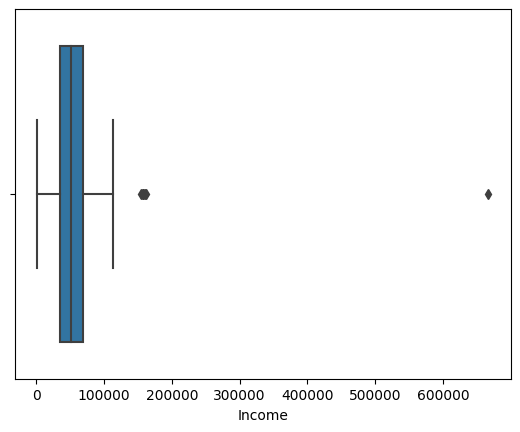

In [8]:
sns.boxplot(x = 'Income', data = df)    # found 1st outliers after 20,000
x1 = df[df['Income']>200000]
df.drop(x1.index,axis=0,inplace=True)   # dropping 1st outliers 

<Axes: xlabel='Income'>

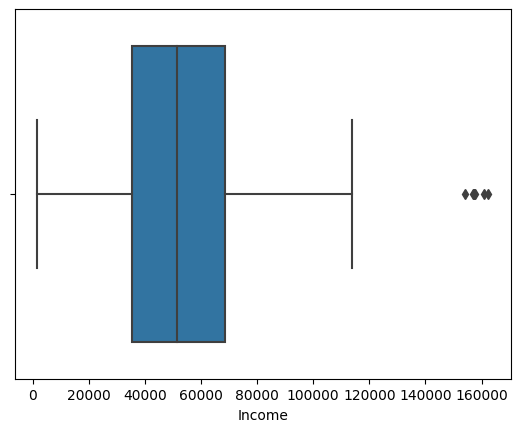

In [9]:
sns.boxplot(x = 'Income', data = df)  #found 2nd outliers after 140,000

<Axes: xlabel='Income'>

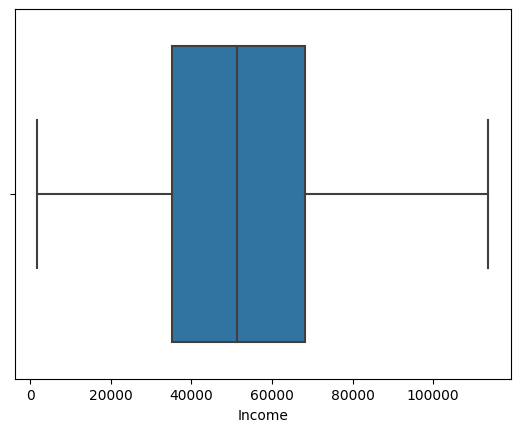

In [10]:
df.drop(index=df[df['Income']>140000].index.tolist(),axis = 0, inplace = True) # dropping 2nd Outlier 
sns.boxplot(x = 'Income', data = df)

### **2. Check the following using an appropriate method and write your findings**
- a. Check how spread out or varied your data set is.
- b. Check where the middle 50% of your data lies.
- c. Check boundaries for the lower, middle and upper quarters of data.

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2232.000000,2232.000000,2208.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,5590.736559,1968.792563,51633.638134,0.444444,0.507168,49.111111,304.930108,26.380376,165.319444,37.644713,...,2.636201,5.808244,5.331541,0.073029,0.074821,0.073029,0.064516,0.013441,0.149642,0.009409
std,3246.390817,11.990340,20713.376530,0.538567,0.544680,28.952893,336.784950,39.821532,219.401447,54.689504,...,2.795959,3.242198,2.415275,0.260242,0.263161,0.260242,0.245725,0.115179,0.356800,0.096562
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,505.000000,33.000000,231.250000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **3. Check for any missing values in the dataset and handle them using an appropriate method.**

In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Found Missing Values in Income
### **Changing Marital_Status (Alone, YOLO, Absurd) to Others**

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'others')
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'others'],
      dtype=object)

#### Filling Null Values
Missing values in Income are filled with mean Income , but using mean Income of the whole data set is not a good choice. Mean According To Marital_Status is the best choice because of its high correlation with Income Column. It is also more logical to group Income by Marital_Status instead of other features.

In [14]:
l = []
for i in df['Marital_Status'].unique():
    x = df[df['Marital_Status'] == i]         
    y = x.fillna(x.Income.mean())
    l.append(y)                             
    print(i,'mean is' ,x.Income.mean())     # Made 6 Dataframe According to Matrital Status and filled the mean value
newdf = pd.concat(l)                        # Concatenated those dataframe and made a new dataframe name df 
newdf.sort_index(axis=0 , inplace=True)     # Sorted New dataframe by Index 
newdf.head(5)

Divorced mean is 52396.61038961039
Single mean is 50995.35031847134
Married mean is 51350.51170960187
Together mean is 51609.400702987696
Widow mean is 56481.55263157895
others mean is 53280.28571428572


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [15]:
newdf.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [16]:
newdf.duplicated().any()

False

### **5.The Marketing Manager wants to know the 'Age' of the customers. Extract the age feature from the given dataset and display the statistical summary of the age? (Statistical Summary: Show the dispersion of the data in the form of graphs. Perform outlier treatment Categorize data in Age Groups)**

In [17]:
def Age(x):
    import datetime
    today = datetime.date.today()
    year = today.strftime("%Y")
    y = int(year)-x
    return y
newdf['Age'] = newdf['Year_Birth'].apply(Age)
newdf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,65
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,56
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,34


<Axes: xlabel='Age'>

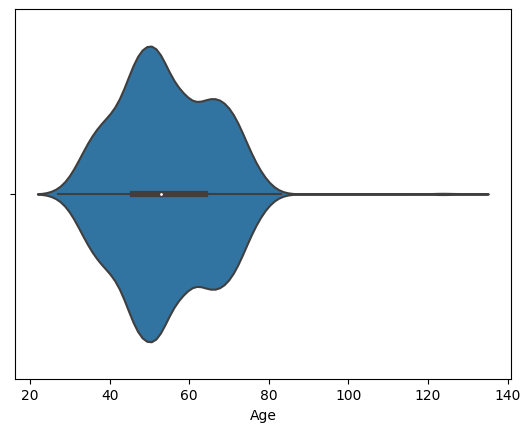

In [18]:
sns.violinplot(x = 'Age', data = newdf)

<Axes: xlabel='Age'>

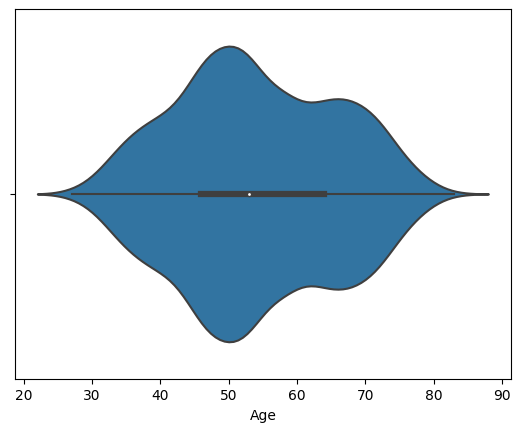

In [19]:
newdf.drop(index = newdf[newdf.Age>120].index,axis=0,inplace =True)
sns.violinplot(x = 'Age', data = newdf)

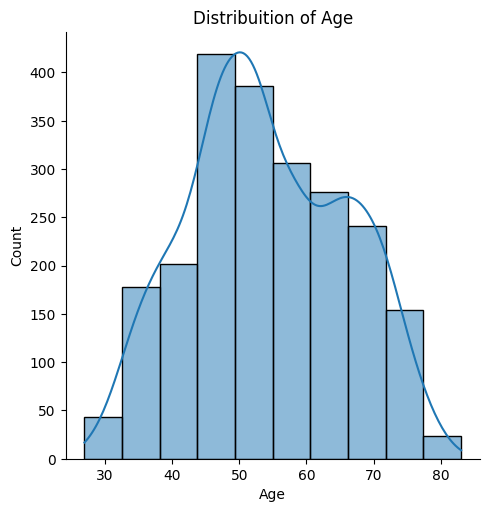

In [20]:
sns.displot(x='Age',bins=10,data=newdf,kde=True)
plt.title('Distribuition of Age')
plt.show()

### **6. The Marketing manager wants to understand the total amount spent on various products so that we can find what percentage of the amount is spent on which product.**
- **a. Find out the total amount spent by a customer.**

In [21]:
newdf['Total amount Spent']=newdf['MntWines']+newdf['MntFruits']+ newdf['MntMeatProducts']+ newdf['MntFishProducts']+ newdf['MntSweetProducts']+newdf['MntGoldProds']

In [22]:
newdf[['ID','Total amount Spent']].head(5)

,ID,Total amount Spent
0,1826,1190
1,1,577
2,10476,251
3,1386,11
4,5371,91


- **b. Display the Percentage of the amount spent on Wines and other products.**

In [50]:
newdf['wines_percentage']         = (newdf['MntWines']/newdf['Total amount Spent'])*100
newdf['Fruits_Percentage']        = (newdf['MntFruits']/newdf['Total amount Spent'])*100
newdf['MeatProducts_percentage']  = (newdf['MntMeatProducts']/newdf['Total amount Spent'])*100
newdf['FishProducts_Percentage']  = (newdf['MntFishProducts']/newdf['Total amount Spent'])*100
newdf['SweetProducts_percentage'] = (newdf['MntSweetProducts']/newdf['Total amount Spent'])*100
newdf['GoldProd_percentage']      = (newdf['MntGoldProds']/newdf['Total amount Spent'])*100

mean_of_all = newdf.groupby('Marital_Status').mean(numeric_only=True)
x=mean_of_all[['wines_percentage','Fruits_Percentage','MeatProducts_percentage',
               'FishProducts_Percentage','SweetProducts_percentage','GoldProd_percentage']].T
x

Marital_Status,Divorced,Married,Single,Together,Widow,others
wines_percentage,48.058361,45.979453,42.919866,47.021550,49.659696,47.410658
Fruits_Percentage,4.689430,5.119504,5.502758,4.417272,4.288104,3.455851
MeatProducts_percentage,24.130236,24.339930,26.245855,25.116757,23.156687,18.195092
FishProducts_Percentage,6.600385,7.220819,7.199472,7.142287,7.404074,9.407954
SweetProducts_percentage,5.173533,5.317808,5.135236,4.692115,4.923337,3.862093
GoldProd_percentage,11.348054,12.022486,12.996814,11.610020,10.568101,17.668352


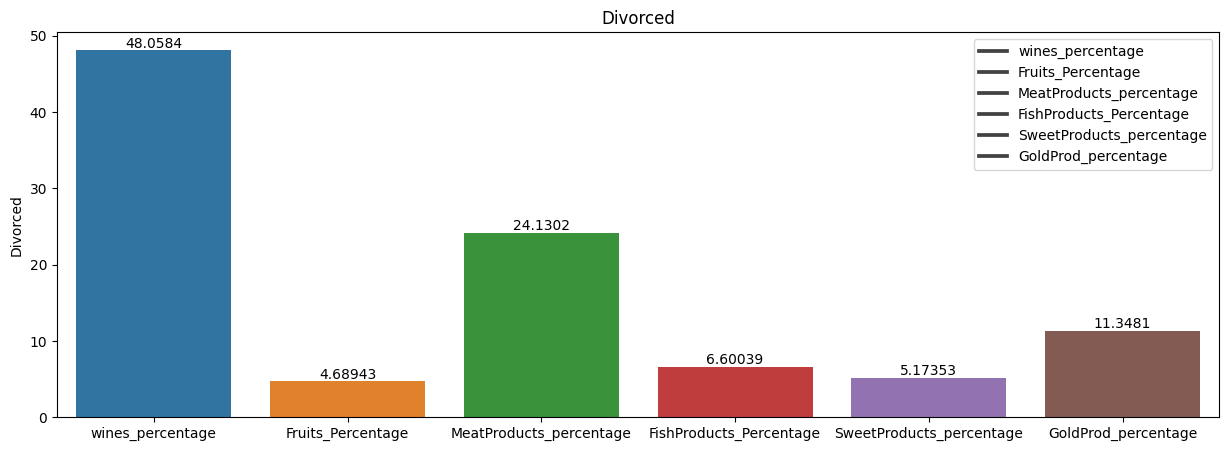

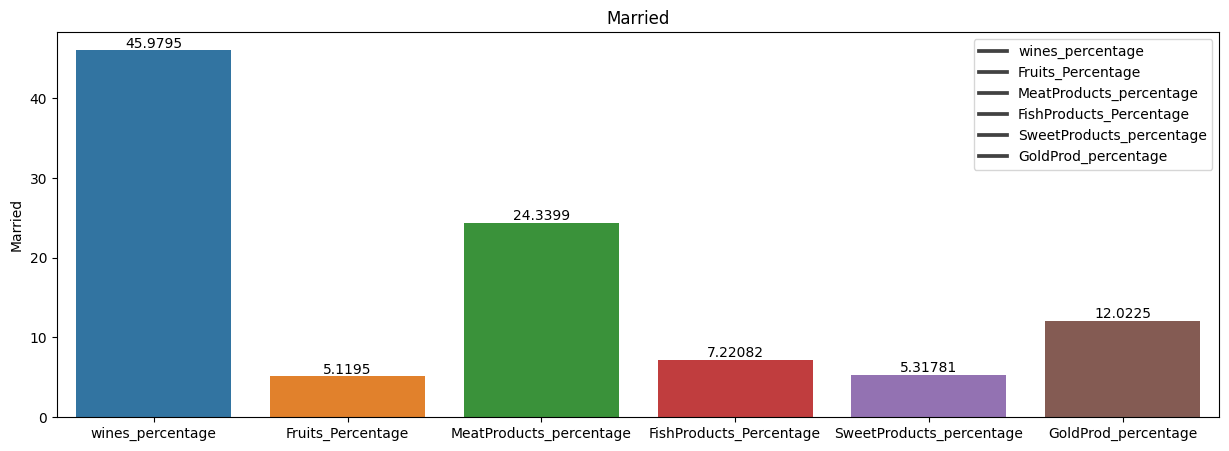

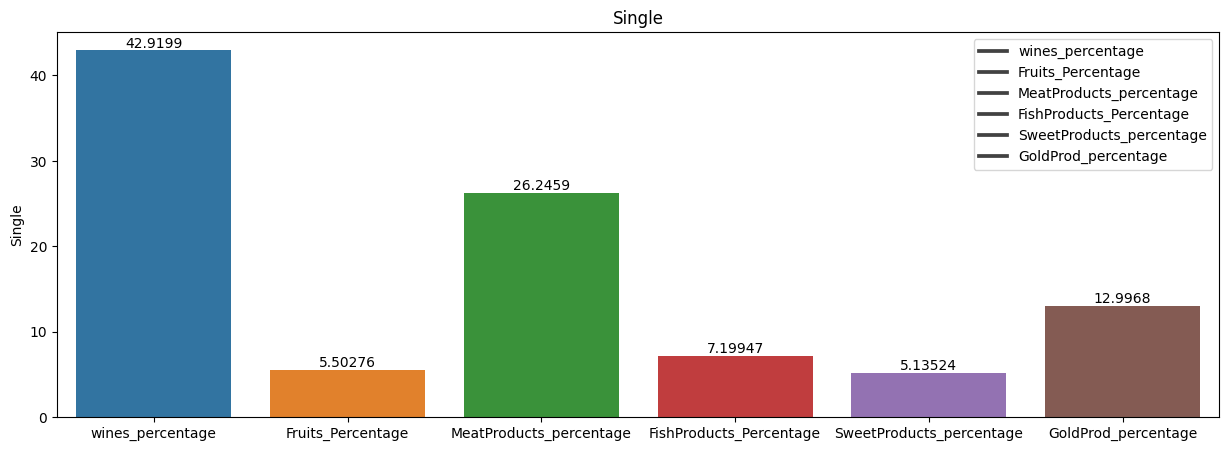

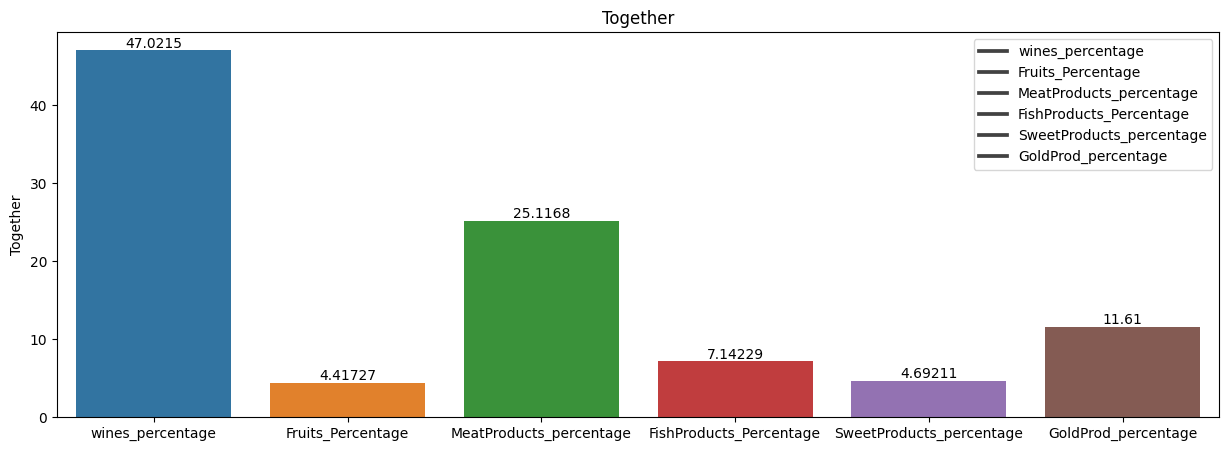

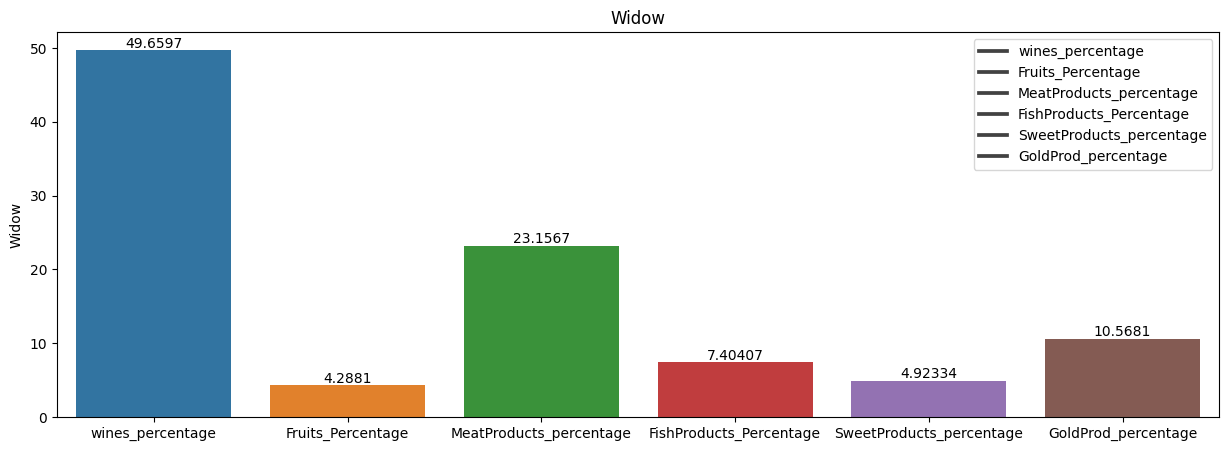

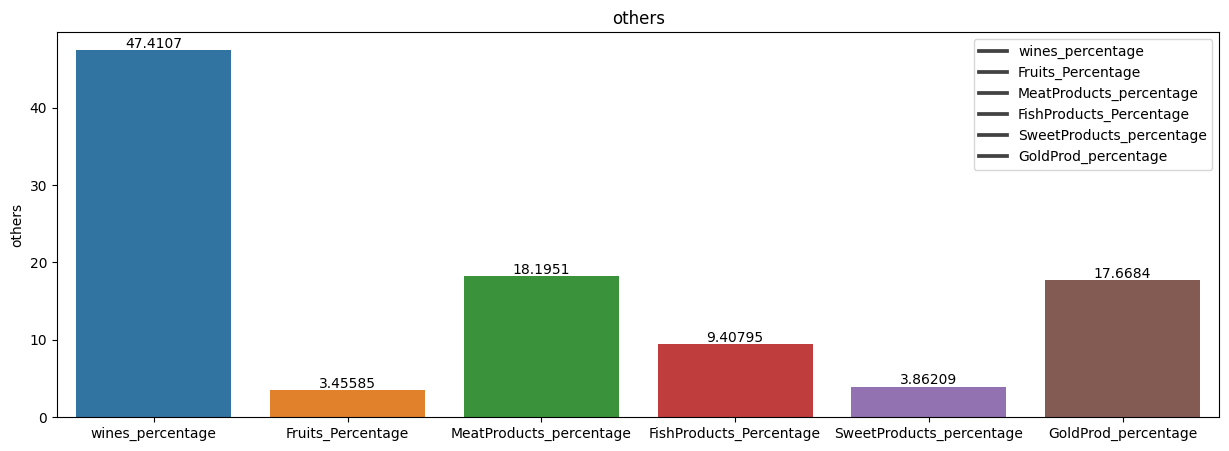

In [51]:
l=['Divorced','Married','Single','Together','Widow','others']
for i in l:
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=x.index,y=i,data=x)
    for label in ax.containers:
        ax.bar_label(label)
    plt.legend(x.index)
    plt.title(i)
    plt.show()

## **8. The marketing manager wants to understand the performance of different marketing campaigns. Find out which marketing campaign is most successful? Use suitable graphs for visualization. (Hint: - use features like AcceptedCmp for campaign information)**

In [25]:
newdf[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,0,0
2237,0,0,0,0,0
2238,0,0,0,0,0


In [26]:
l1 = []
l=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']
for i in l:
    x = newdf[i].sum()
    l1.append(x)
l1

[144, 30, 163, 167, 162]

Text(0.5, 1.0, 'visualization of campaign')

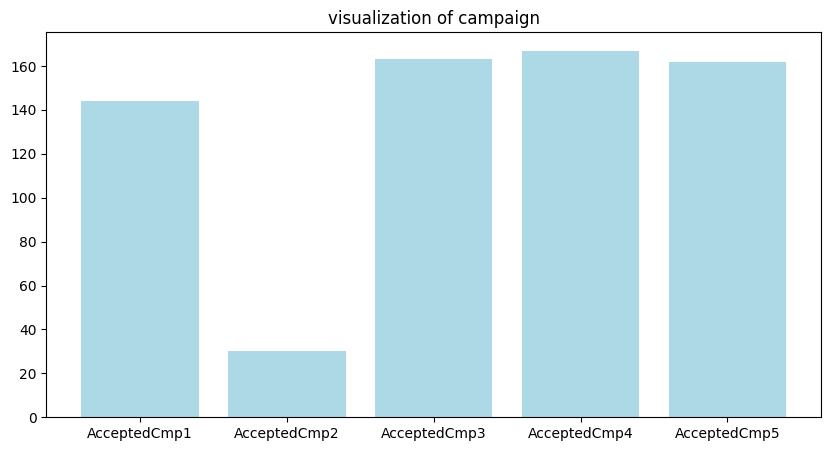

In [27]:
plt.figure(figsize=(10,5))
plt.bar(l, l1,color='lightblue')
plt.title('visualization of campaign')

From above Diagram we see that there is Most Successful campaign is **campaign 4('AcceptedCmp4')** and least successful campaign is **campaign 2('AcceptedCmp2')**

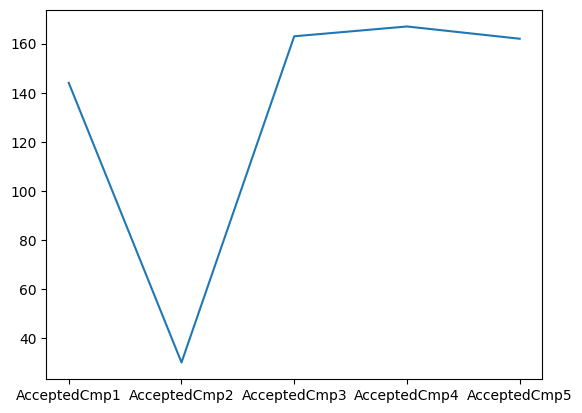

In [28]:
plt.plot(l, l1)

### **9. The marketing manager wants to understand which products are performing the best and which are performing the least in terms of revenue. Being an analyst, analyse the data and plot a suitable graph to display a report on revenue generated by different products.**

In [29]:
x12 = newdf.groupby('Marital_Status').sum(numeric_only=True)
x12 = x12[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].T
x12

Marital_Status,Divorced,Married,Single,Together,Widow,others
MntWines,75348,258674,138391,177070,28434,1909
MntFruits,6356,22216,12881,14543,2548,187
MntMeatProducts,34839,135623,87407,95170,14575,804
MntFishProducts,8122,30550,18337,22497,3957,442
MntSweetProducts,6217,23064,13086,15084,3004,88
MntGoldProds,10713,36993,20988,24690,4371,573


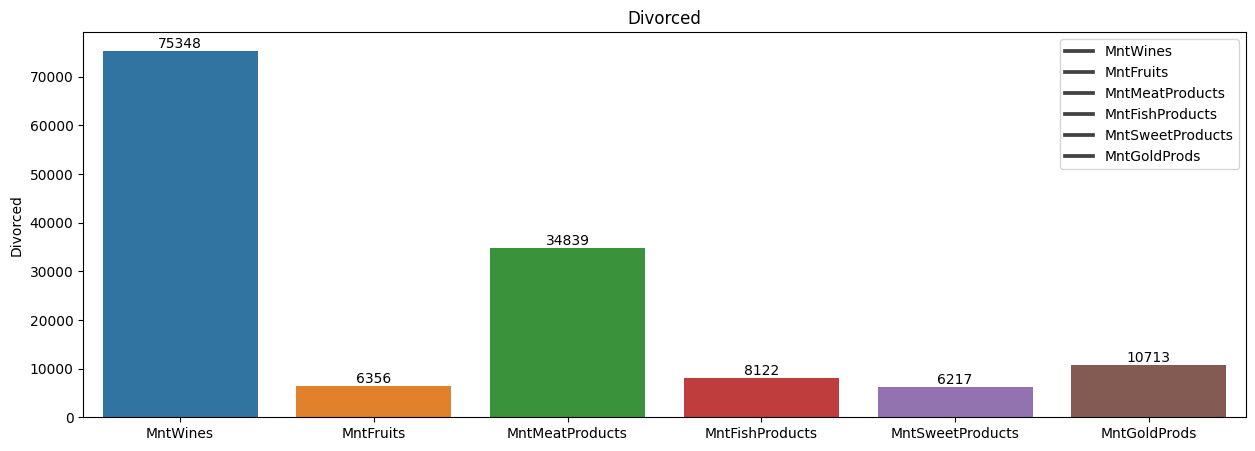

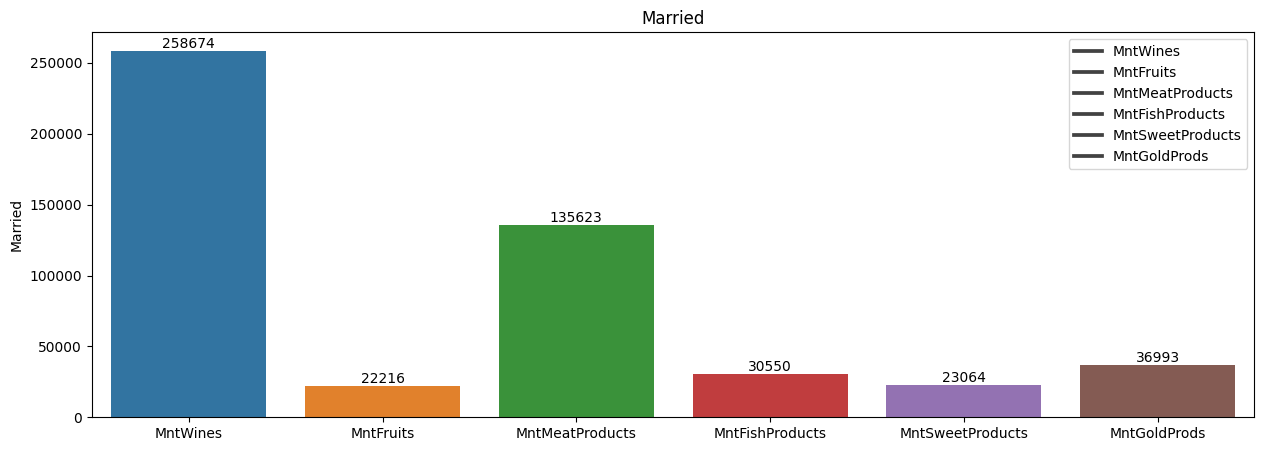

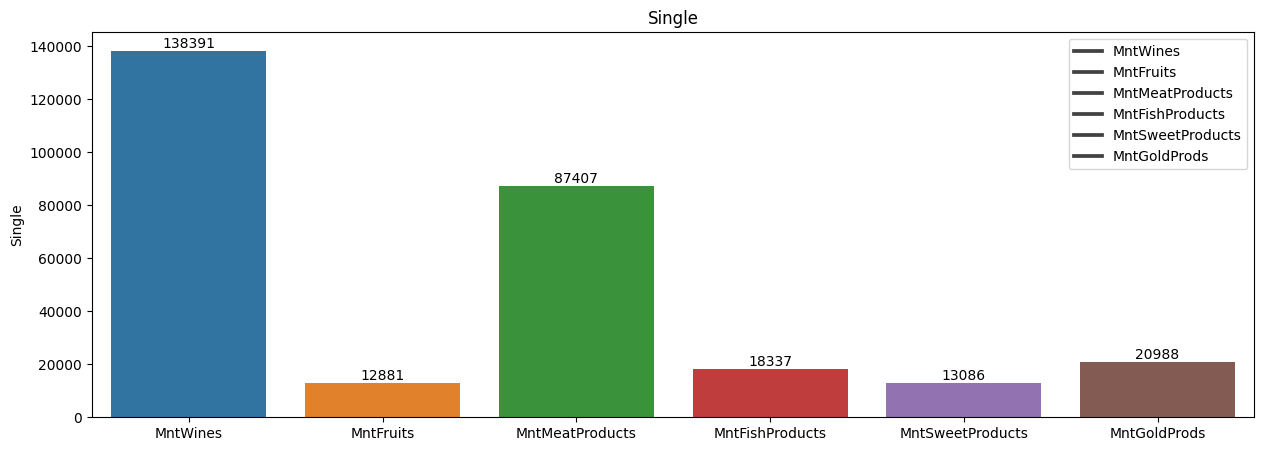

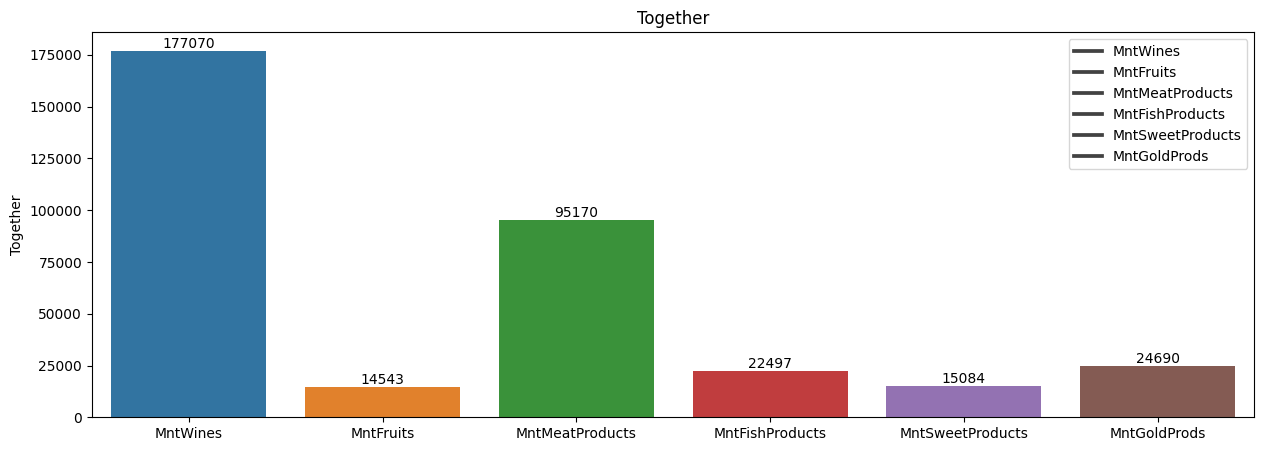

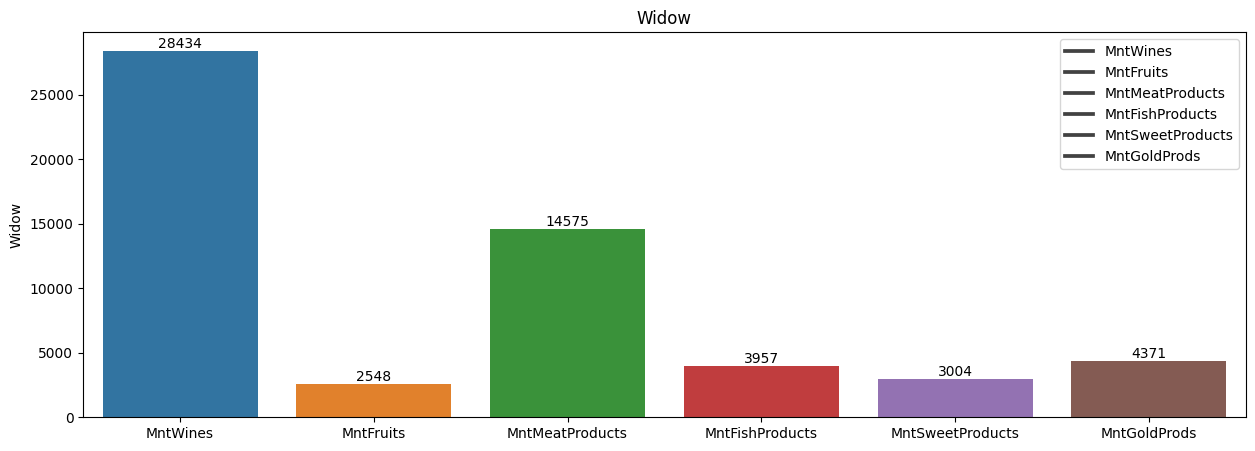

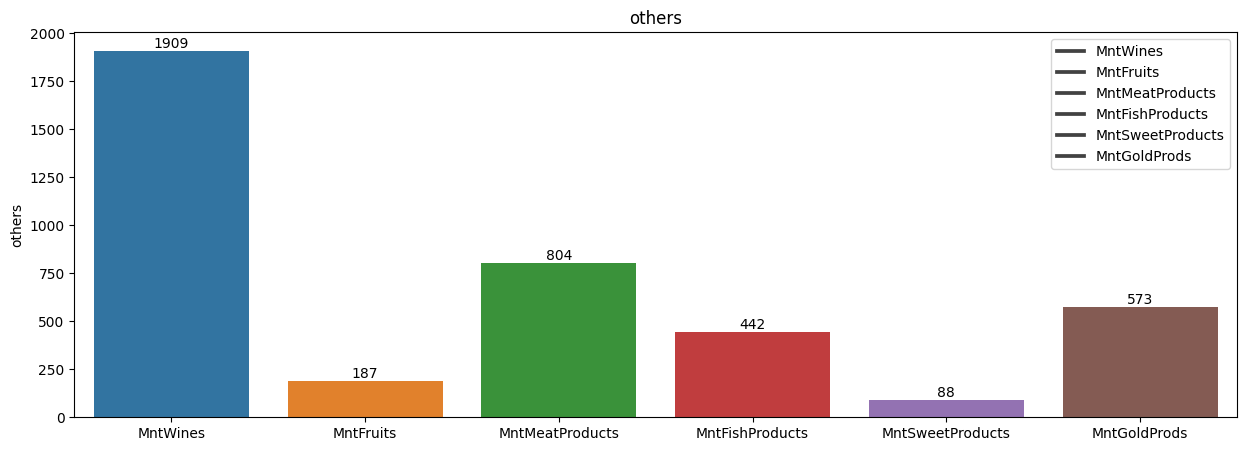

In [54]:
l=['Divorced','Married','Single','Together','Widow','others']
for i in l:
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=x12.index,y=i,data=x12)
    for label in ax.containers:
        ax.bar_label(label)
        plt.legend(x12.index)
        plt.title(i)
    plt.show()

### **9. The team wants to understand if there’s any pattern between the age of customers and the last campaign acceptance rate. Plot a suitable graph to visualize the distribution of the age with respect to customers who accepted the last campaign**

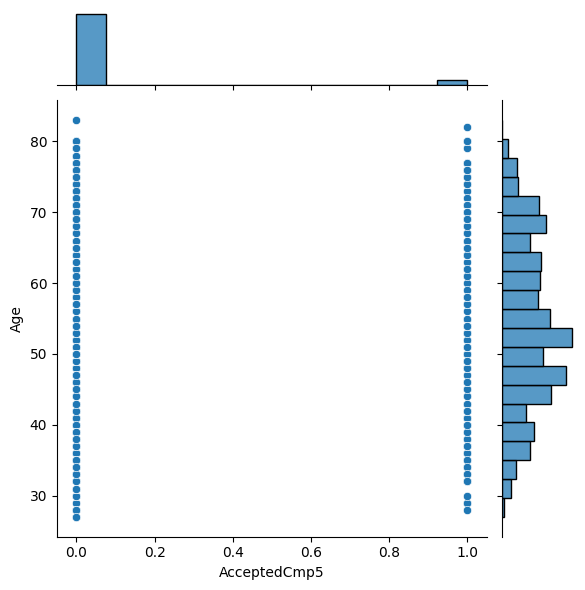

In [31]:
sns.jointplot(x='AcceptedCmp5',y='Age', data = newdf)

### **10. The Chief Marketing specialist wants to visually see which Country has the most number of customers who accepted the last campaign. What is your approach?**

In [32]:
newdf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,Age,Total amount Spent,wines_percentage,Fruits_Percentage,MeatProducts_percentage,FishProducts_Percentage,SweetProducts_percentage,GoldProd_percentage
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,SP,53,1190,15.882353,8.739496,31.848739,9.327731,15.882353,18.319328
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,CA,62,577,80.415945,0.866551,11.091854,1.213172,0.000000,6.412478
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,US,65,251,53.386454,4.382470,23.505976,5.976096,0.796813,11.952191
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,AUS,56,11,90.909091,0.000000,9.090909,0.000000,0.000000,0.000000
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,SP,34,91,6.593407,17.582418,26.373626,12.087912,0.000000,37.362637


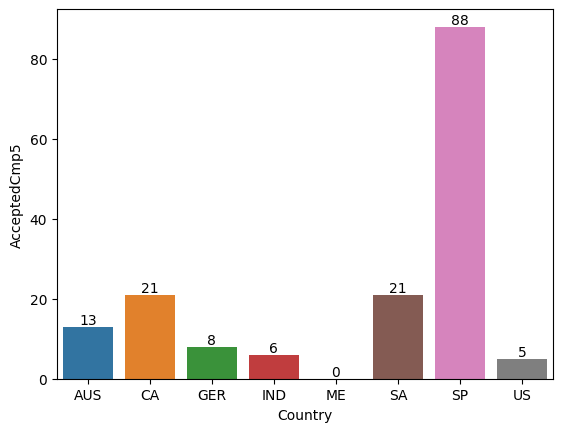

In [33]:
c=newdf.groupby('Country')[['AcceptedCmp5']].sum()
ax=sns.barplot(x=c.index,y='AcceptedCmp5',data=c)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

From above diagram we see that there is highest number of customer who accept offer in last campaign in **Spain(SP)** country.

### **11. Analyse visually and write your inferences about the relationship between the following:-**

**1. Total amount spent Vs Dependents. (Dependents=['Kidhome']+['Teenhome'])**

In [34]:
newdf['Total Dependents'] = newdf['Kidhome']+newdf['Teenhome']
newdf[['Total Dependents','Total amount Spent']]

,Total Dependents,Total amount Spent
0,0,1190
1,0,577
2,1,251
3,2,11
4,1,91
...,...,...
2235,1,689
2236,1,55
2237,1,309
2238,0,1383


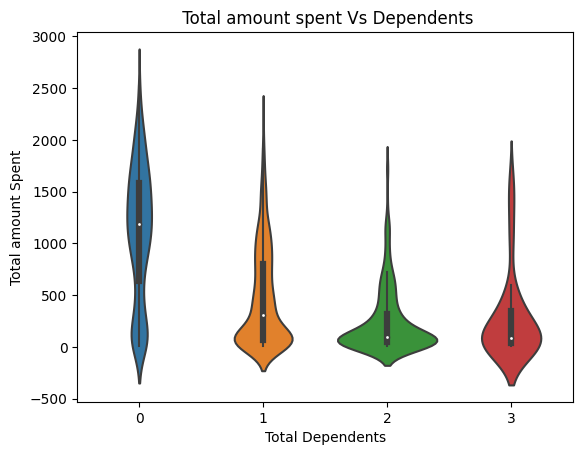

In [35]:
ax = sns.violinplot(x = 'Total Dependents', y = 'Total amount Spent', data = newdf)
plt.title(' Total amount spent Vs Dependents')
plt.show()

**2. Total Purchases Vs Dependents.**

In [36]:
newdf['Total Purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
newdf[['Total Purchases','Total Dependents']]

,Total Purchases,Total Dependents
0,15,0
1,18,0
2,11,1
3,4,2
4,8,1
...,...,...
2235,20,1
2236,5,1
2237,14,1
2238,20,0


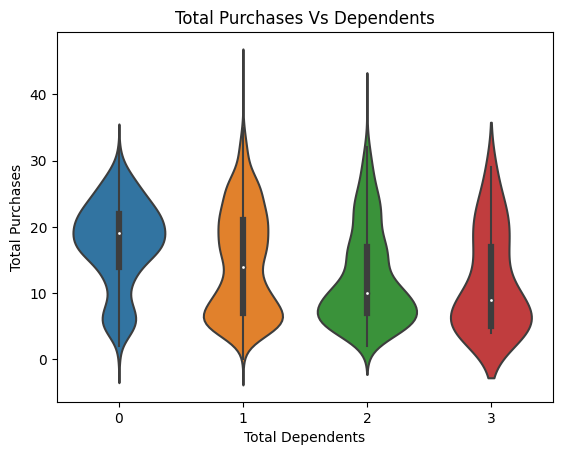

In [37]:
ax = sns.violinplot(x = 'Total Dependents', y = 'Total Purchases', data = newdf)
plt.title('Total Purchases Vs Dependents')
plt.show()

### **12. Convert the Year_Birth column into categorical column. Create categories according to the analysis done so far.**

In [38]:
def agegrp(age):
    
    if age<10:               return 'Child'
    elif age>10 and age<=18: return 'Teenager'
    elif age>18 and age<50:  return 'Adult'
    elif age>50 and age<80:  return 'Old'
    elif age>=80:            return 'Senior Citizen'
    
newdf['Agegroup']=newdf['Age'].apply(agegrp)

In [39]:
newdf['Agegroup'].sample(5)

686       Old
2097      Old
41        Old
138     Adult
608     Adult
Name: Agegroup, dtype: object

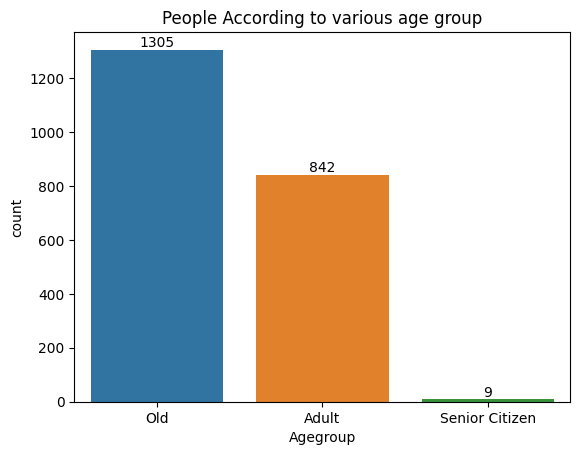

In [40]:
x=sns.countplot(x=newdf['Agegroup'])
for label in x.containers:
    x.bar_label(label)
plt.title("People According to various age group")
plt.show()

### **13. Perform Correlation Analysis and write your key inferences.**

In [41]:
x=newdf.corr(numeric_only=True).abs().unstack().sort_values(ascending=False) # sort value sort all the data decendingly
x = x[x != 1].drop_duplicates()                               # .abs(): done to make data positive and in float type 
top_5_corr=pd.DataFrame(x.head(10))                           # .unstack() :  done to unstack the data 
top_5_corr.reset_index(inplace=True)

The .pivot() method in pandas is used to reshape a DataFrame by converting values from one or more columns into columns themselves, effectively transforming the data. It is a powerful tool for reorganizing and aggregating data based on specified columns. 

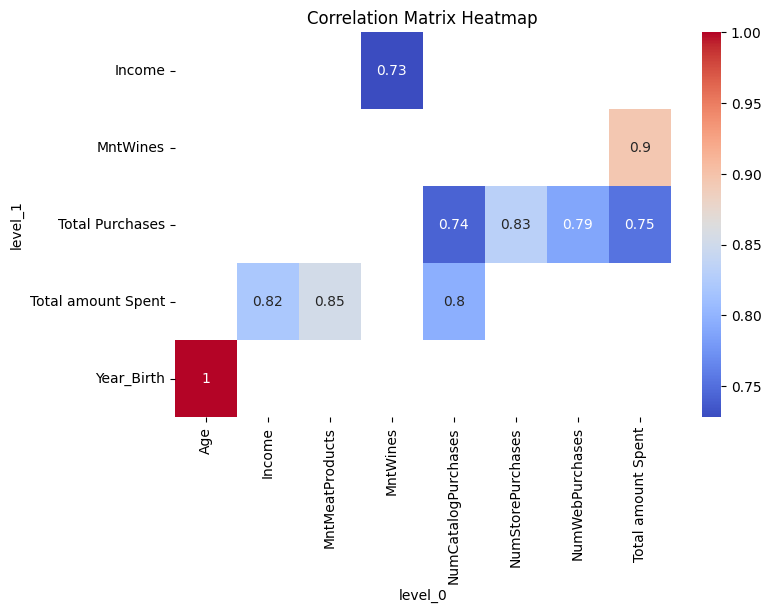

In [42]:
# Create the correlation matrix
correlation_matrix = top_5_corr.pivot(columns='level_0', index='level_1', values=0) 

# Set up the figure and plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

### 14. Understand the Education background of the customers who complained in the last 2 years. State the Education background of the customers who have registered the most number of complaints.

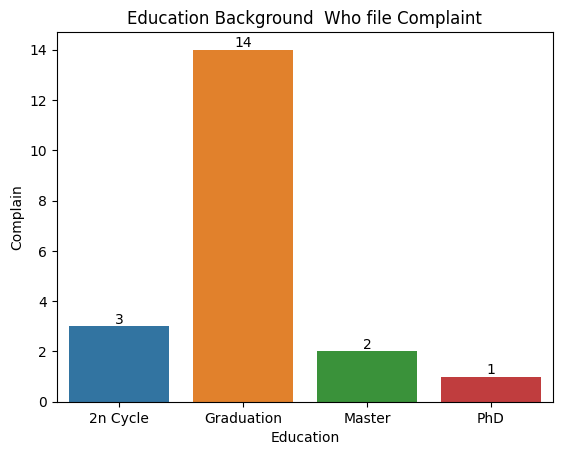

In [43]:
complain_customer = newdf[newdf['Complain']==1]
x=complain_customer.groupby('Education').sum()[['Complain']]
ax=sns.barplot(x=x.index,y='Complain',data=x)
for label in ax.containers:
      ax.bar_label(label)
plt.title('Education Background  Who file Complaint')
plt.show()

# Completed